# Fine-tune GIT-base on a custom dataset for image captioning

In this notebook, we'll fine-tune GIT, short for GenerativeImage2Text, on a toy image captioning dataset.

GIT is, at the moment of writing, a state-of-the-art image/video captioning and question answering (QA) model.

### Set-up environment

In [ ]:
!pip install -q git+https://github.com/huggingface/transformers.git

In [ ]:
!pip install -U - datasets
!pip install -q fsspec

## Create image captioning dataset

Next, we'll create a tiny image captioning dataset, which as you might have guessed consists of (image, text) pairs.

As I'm a football fan I simply went to the Wikipedia page of a few of the most famous footballers, and took a captioned image from their respective pages.

In [ ]:
import os
import json

captions = [{"file_name": "train/ronaldo.jpeg", "text": "Ronaldo with Portugal at the 2018 World Cup"},
{"file_name": "train/messi.jpeg", "text": "Messi with Argentina at the 2022 FIFA World Cup"},
{"file_name": "train/zidane.jpeg", "text": "Zinédine Zidane pendant la finale de la Coupe du monde 2006."},
{"file_name": "train/maradona.jpeg", "text": "Maradona after winning the 1986 FIFA World Cup with Argentina"},
{"file_name": "train/ronaldo_.jpeg", "text": "Ronaldo won La Liga in his first season and received the Pichichi Trophy in his second."},
{"file_name": "train/pirlo.jpeg", "text": "Pirlo with Juventus in 2014"},]

# path to the folder containing the images
# root = "/content/drive/MyDrive/GenerativeImage2Text/Tutorial notebooks/Toy_dataset/"
root = "datasets/image_captioning"
os.makedirs(root, exist_ok=True)

# add metadata.jsonl file to this folder
with open(root + "/metadata.jsonl", 'w') as f:
    for item in captions:
        f.write(json.dumps(item) + "\n")

In [ ]:
from datasets import load_dataset 

dataset = load_dataset("imagefolder", data_dir=root, split="train")

Generating train split: 0 examples [00:00, ? examples/s]

ValueError: Instruction "train" corresponds to no data!

Let's check whether the dataset is created correctly:

In [ ]:
dataset

Dataset({
    features: ['image', 'text'],
    num_rows: 6
})

Let's take a look at one example:

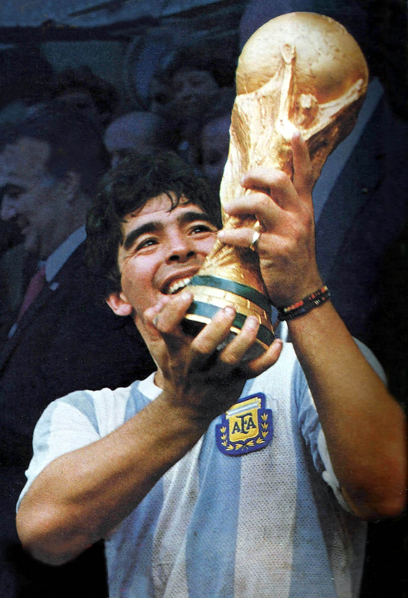

In [ ]:
example = dataset[0]
image = example["image"]
width, height = image.size
display(image.resize((int(0.3*width), int(0.3*height))))

In [ ]:
example["text"]

'Maradona after winning the 1986 FIFA World Cup with Argentina'

## Create PyTorch Dataset

Next, we create a standard PyTorch dataset. Each item of the dataset returns the expected inputs for the model, in this case input_ids, attention_mask and pixel_values.

We use GitProcessor to turn each (image, text) pair into the expected inputs. Basically, the text gets turned into input_ids and attention_mask, and the image gets turned into pixel_values.

In [ ]:
from torch.utils.data import Dataset

class ImageCaptioningDataset(Dataset):
    def __init__(self, dataset, processor):
        self.dataset = dataset
        self.processor = processor

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        item = self.dataset[idx]

        encoding = self.processor(images=item["image"], text=item["text"], padding="max_length", return_tensors="pt")

        # remove batch dimension
        encoding = {k:v.squeeze() for k,v in encoding.items()}

        return encoding

In [ ]:
from transformers import AutoProcessor

processor = AutoProcessor.from_pretrained("microsoft/git-base", cache_dir="result")

preprocessor_config.json:   0%|          | 0.00/503 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/453 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [ ]:
train_dataset = ImageCaptioningDataset(dataset, processor)

In [ ]:
item = train_dataset[0]
for k,v in item.items():
    print(k,v.shape)

Unused or unrecognized kwargs: padding.


input_ids torch.Size([512])
attention_mask torch.Size([512])
pixel_values torch.Size([3, 224, 224])


## Create PyTorch DataLoader


In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=2)

In [ ]:
batch = next(iter(train_dataloader))
for k,v in batch.items():
    print(k,v.shape)

Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


input_ids torch.Size([2, 512])
attention_mask torch.Size([2, 512])
pixel_values torch.Size([2, 3, 224, 224])


In [ ]:
processor.decode(batch["input_ids"][0])

'[CLS] pirlo with juventus in 2014 [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]

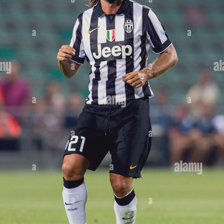

In [ ]:
from PIL import Image
import numpy as np

MEAN = np.array([123.675, 116.280, 103.530]) / 255
STD = np.array([58.395, 57.120, 57.375]) / 255

unnormalized_image = (batch["pixel_values"][0].numpy() * np.array(STD)[:, None, None]) + np.array(MEAN)[:, None, None]
unnormalized_image = (unnormalized_image * 255).astype(np.uint8)
unnormalized_image = np.moveaxis(unnormalized_image, 0, -1)
Image.fromarray(unnormalized_image)

## Define model

Next, we instantiate a model. We start from the pre-trained GIT-base model (which was already pre-trained on 4 million image-text pairs by Microsoft).

In [ ]:
from transformers import AutoModelForCausalLM

model = AutoModelForCausalLM.from_pretrained("microsoft/git-base", cache_dir='result')

config.json:   0%|          | 0.00/2.82k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/707M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

## Dummy forward pass

In [ ]:

outputs = model(input_ids=batch["input_ids"],
                attention_mask=batch["attention_mask"],
                pixel_values=batch["pixel_values"],
                labels=batch["input_ids"])
outputs.loss

tensor(12.2838, grad_fn=<NllLossBackward0>)

## Train the model

Next, let's train the model! We use native PyTorch here.

As I created a super tiny dataset just for demo purposes, we'll let the model overfit it. If it's capable of overfitting it (i.e. achieve zero loss), then that's a great way to know that everything is working properly.

In [ ]:
import torch

optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

model.train()

for epoch in range(50):
    print("Epoch:", epoch)
    for idx, batch in enumerate(train_dataloader):
        input_ids = batch.pop("input_ids").to(device)
        pixel_values = batch.pop("pixel_values").to(device)

        outputs = model(input_ids=input_ids,
                        pixel_values=pixel_values,
                        labels=input_ids)

        loss = outputs.loss

        print("Loss:", loss.item())

        loss.backward()

        optimizer.step()
        optimizer.zero_grad()

Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Epoch: 0
Loss: 9.027359962463379


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 8.863261222839355


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 8.608870506286621


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Epoch: 1
Loss: 8.484485626220703


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 8.319971084594727


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 8.148983001708984


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Epoch: 2
Loss: 8.031722068786621


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 7.970705032348633


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 7.846879005432129


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Epoch: 3
Loss: 7.724047660827637


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 7.603226661682129


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 7.561845302581787


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Epoch: 4
Loss: 7.365166664123535


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 7.348947525024414


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 7.2243266105651855


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Epoch: 5
Loss: 7.123194217681885


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 6.9484782218933105


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 6.9106855392456055


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Epoch: 6
Loss: 6.803751468658447


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 6.6681342124938965


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 6.545366287231445


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Epoch: 7
Loss: 6.476253032684326


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 6.341801643371582


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 6.234458923339844


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Epoch: 8
Loss: 6.1363444328308105


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 6.071059226989746


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 5.8716654777526855


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Epoch: 9
Loss: 5.769880771636963


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 5.734551906585693


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 5.583984851837158


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Epoch: 10
Loss: 5.4558281898498535


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 5.388235569000244


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 5.248194217681885


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Epoch: 11
Loss: 5.11472749710083


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 5.043748378753662


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 4.918703556060791


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Epoch: 12
Loss: 4.788382053375244


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 4.681577205657959


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 4.5859479904174805


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Epoch: 13
Loss: 4.429408550262451


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 4.3420634269714355


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 4.259561538696289


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Epoch: 14
Loss: 4.132824420928955


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 3.9974985122680664


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 3.8741419315338135


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Epoch: 15
Loss: 3.7878692150115967


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 3.6755125522613525


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 3.517559051513672


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Epoch: 16
Loss: 3.3926000595092773


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 3.3219850063323975


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 3.242068290710449


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Epoch: 17
Loss: 3.1070055961608887


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 2.9916257858276367


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 2.8529036045074463


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Epoch: 18
Loss: 2.7685563564300537


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 2.620274066925049


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 2.5680501461029053


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Epoch: 19
Loss: 2.45647931098938


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 2.3251311779022217


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 2.215388536453247


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Epoch: 20
Loss: 2.128455877304077


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 2.009150266647339


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 1.9337955713272095


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Epoch: 21
Loss: 1.834897518157959


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 1.717788577079773


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 1.6448122262954712


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Epoch: 22
Loss: 1.566462516784668


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 1.4603725671768188


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 1.3664525747299194


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Epoch: 23
Loss: 1.3018879890441895


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 1.2143969535827637


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 1.1498243808746338


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Epoch: 24
Loss: 1.0853241682052612


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 1.004045844078064


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.9372466206550598


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Epoch: 25
Loss: 0.8836475610733032


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.8168535828590393


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.7802321910858154


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Epoch: 26
Loss: 0.7315782308578491


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.6670108437538147


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.628933846950531


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Epoch: 27
Loss: 0.5943464040756226


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.5490188598632812


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.5165486931800842


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Epoch: 28
Loss: 0.4802538752555847


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.45384928584098816


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.43326205015182495


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Epoch: 29
Loss: 0.3953068256378174


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.37606507539749146


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.3642691671848297


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Epoch: 30
Loss: 0.33439913392066956


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.31337618827819824


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.3081522285938263


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Epoch: 31
Loss: 0.2910824716091156


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.27017274498939514


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.2552269697189331


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Epoch: 32
Loss: 0.2425670623779297


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.2352423369884491


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.23296287655830383


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Epoch: 33
Loss: 0.21245354413986206


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.20030708611011505


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.20633311569690704


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Epoch: 34
Loss: 0.18685944378376007


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.19085653126239777


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.17073528468608856


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Epoch: 35
Loss: 0.16625480353832245


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.16062796115875244


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.16127514839172363


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Epoch: 36
Loss: 0.14956124126911163


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.14434927701950073


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.14667673408985138


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Epoch: 37
Loss: 0.13693243265151978


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.13736329972743988


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.1296672224998474


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Epoch: 38
Loss: 0.1239783763885498


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.12674039602279663


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.11936678737401962


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Epoch: 39
Loss: 0.12105242908000946


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.11147980391979218


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.10954805463552475


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Epoch: 40
Loss: 0.10545031726360321


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.11038026213645935


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.10104703158140182


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Epoch: 41
Loss: 0.10554957389831543


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.09662129729986191


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0948106199502945


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Epoch: 42
Loss: 0.09857594966888428


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.09020951390266418


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.08974481374025345


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Epoch: 43
Loss: 0.0877147763967514


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.09191828221082687


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.08387504518032074


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Epoch: 44
Loss: 0.08211857825517654


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.08733519166707993


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.07930032163858414


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Epoch: 45
Loss: 0.0772179588675499


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.08282463997602463


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.07537747919559479


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Epoch: 46
Loss: 0.07364419847726822


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.07885844260454178


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.07208327203989029


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Epoch: 47
Loss: 0.0767408162355423


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.06947401165962219


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.06798256188631058


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Epoch: 48
Loss: 0.06712440401315689


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.07218831032514572


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.06522523611783981


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Epoch: 49
Loss: 0.06451134383678436


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.06901128590106964


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.06232571229338646


## Inference
Now that we've trained the model, let's load the Maradona image and perform inference on it.

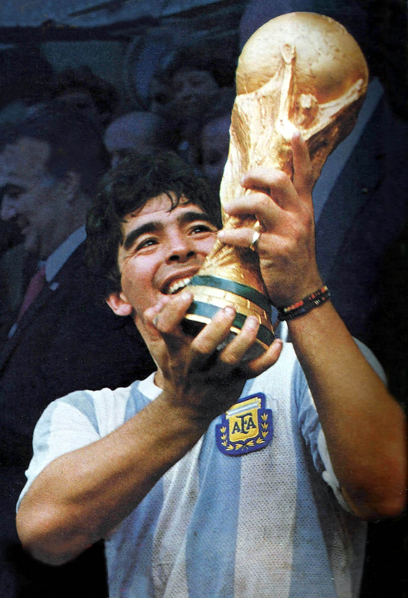

In [ ]:

# load image
example = dataset[0]
image = example["image"]
width, height = image.size
display(image.resize((int(0.3*width), int(0.3*height))))

In [ ]:
# prepare image for the model
inputs = processor(images=image, return_tensors="pt").to(device)
pixel_values = inputs.pixel_values

generated_ids = model.generate(pixel_values=pixel_values, max_length=50)
generated_caption = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
print(generated_caption)

maradona after winning the 1986 fifa world cup with argentina
